# Tetris Scratch Notebook

Process Pallete first


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sheets/tetris_title.png')

RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
GRAY_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

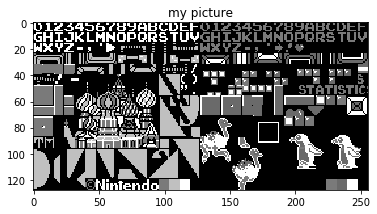

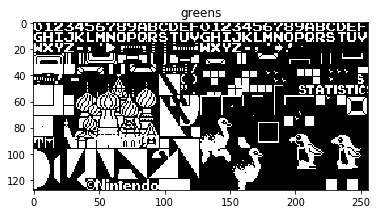

In [4]:
plt.imshow(GRAY_img, cmap='Greys_r')
plt.title('my picture')
plt.show()


_, masked= cv2.threshold(GRAY_img, 100, 255, cv2.THRESH_BINARY)
masked = cv2.bitwise_not(masked)

plt.imshow(masked, cmap="Greys")
plt.title('greens')
plt.show()



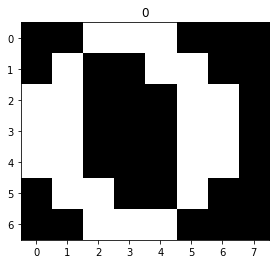

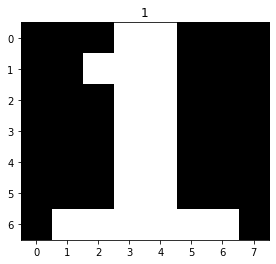

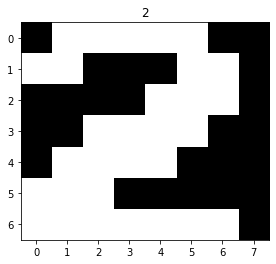

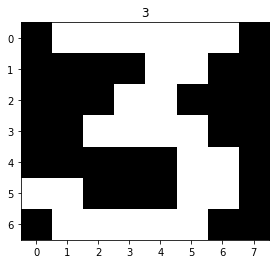

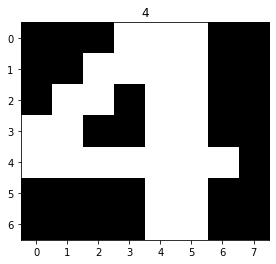

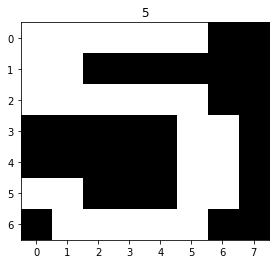

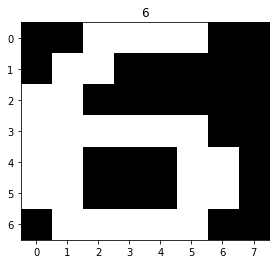

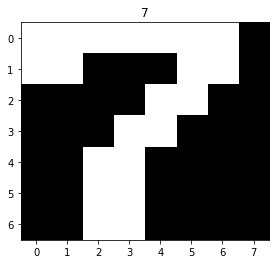

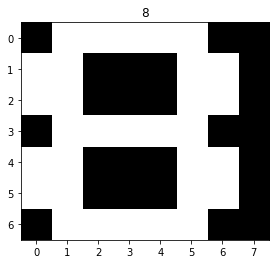

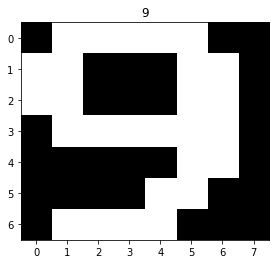

In [10]:
palette_x = 0
digit_images = []
# Digit Images
for digit in range(10):
    origin_palette_x = palette_x + 8 * digit
    digit_images.append(
        masked[0:7, origin_palette_x:origin_palette_x+8]
    )
for i, digit_image in enumerate(digit_images):
    plt.imshow(digit_image, cmap="Greys")
    plt.title(f"{i}")
    plt.show()


## Test out digit reading

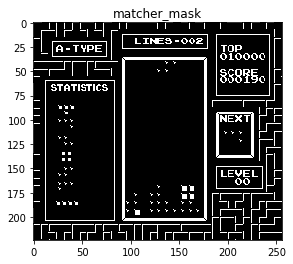

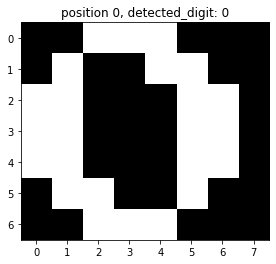

position 0, detected_digit: 0
position 1, detected_digit: 0
position 2, detected_digit: 0
position 3, detected_digit: 1
position 4, detected_digit: 9
position 5, detected_digit: 0


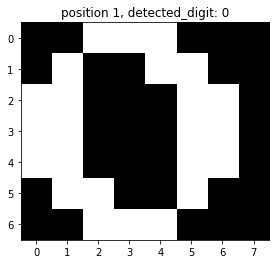

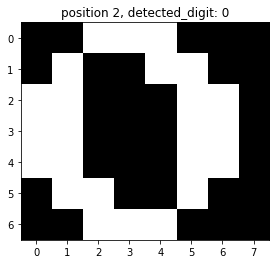

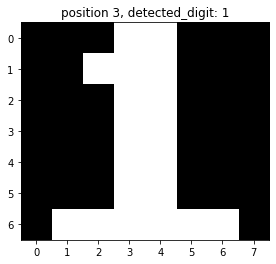

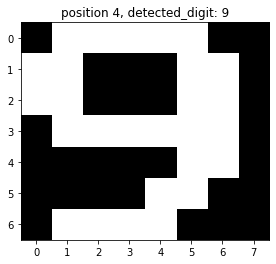

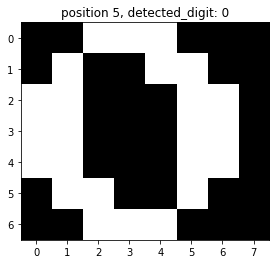

In [15]:
snap_img = cv2.imread('samples/snap_46104.png')
GRAY_snap_img = cv2.cvtColor(snap_img, cv2.COLOR_BGR2GRAY)
# 32, 23

_, masked= cv2.threshold(GRAY_snap_img, 200, 255, cv2.THRESH_BINARY)
matcher_mask = cv2.bitwise_not(masked)

plt.imshow(matcher_mask, cmap="Greys")
plt.title(f"matcher_mask")
plt.show()


for i in range(6):
    cropped_digit = matcher_mask[56:63, 192+i*8:(192+8)+i*8]
    detected_digit_and_diff = (None, 99999)
    for num, digit_image in enumerate(digit_images):
        xor_mask = cv2.bitwise_xor(cropped_digit, digit_image)
        count_nonzero = np.count_nonzero(xor_mask)
        # plt.imshow(xor_mask, cmap="Greys")
        # plt.title(f"mask {num}, count_nonzero {count_nonzero}")
        # plt.show()
        if count_nonzero < detected_digit_and_diff[1]:
            detected_digit_and_diff = (num, count_nonzero)
    detected_digit = detected_digit_and_diff[0]

    plt.imshow(cropped_digit, cmap="Greys")
    title = f"position {i}, detected_digit: {detected_digit}"
    plt.title(title)
    plt.show()
    print(title)

# Matcher implementation

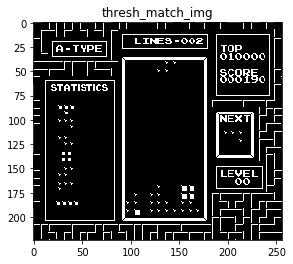

In [16]:
match_img = cv2.imread('samples/snap_46104.png')
gray_match_img = cv2.cvtColor(match_img, cv2.COLOR_BGR2HSV)
_, thresh_match_img= cv2.threshold(GRAY_snap_img, 200, 255, cv2.THRESH_BINARY)
thresh_match_img = cv2.bitwise_not(thresh_match_img)

plt.imshow(thresh_match_img, cmap="Greys")
plt.title(f"thresh_match_img")
plt.show()

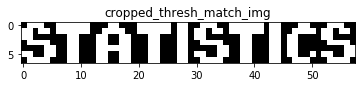

In [18]:
cropped_thresh_match_img = thresh_match_img[64:71, 19:77]
plt.imshow(cropped_thresh_match_img, cmap="Greys")
plt.title(f"cropped_thresh_match_img")
plt.show()